In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import collections

## 전처리 완료된 파일 불러오기

In [2]:
_hearts = pd.read_csv(os.path.join("data", "heart_rate_all_day.csv"))
_steps = pd.read_csv(os.path.join("data", "step_count_all_day.csv"))

## 사용할 시간 추출
- 기상 시간 09시 15분
- 집에서 출발한 시간 11시 45분
- 집에 도착한 시각 19시 30분
- 690 ~ 1170 인덱스까지 사용하는 것으로 결정

In [3]:
hearts = _hearts[690:1170]
steps = _steps[690:1170]

In [4]:
hearts = hearts.applymap(lambda x: x[-5:] if type(x) == str else x)
steps = steps.applymap(lambda x: x[-5:] if type(x) == str else x)

In [5]:
hearts_x = list(hearts["Time"])
hearts_y = list(hearts["Hearts"])

In [6]:
steps_x = list(steps["Time"])
steps_y = list(steps["Step"])

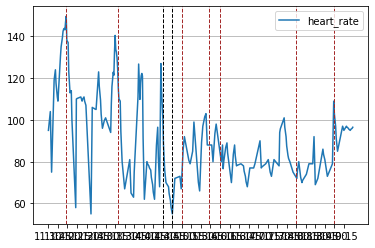

In [7]:
plt.plot(hearts_x, hearts_y, label = "heart_rate")
plt.rcParams['figure.figsize'] = (20, 4)
plt.rcParams['font.size'] = 10
plt.rcParams["lines.linewidth"] = 1
plt.xticks(np.arange(0, 480, 15))
plt.grid(True, axis='y')

plt.axvline(28, color = 'brown', linestyle = '--', linewidth = 1) # 11:58 pm
plt.axvline(110, color = 'brown', linestyle = '--', linewidth = 1) # 13:20 pm
plt.axvline(180, color = 'black', linestyle = '--', linewidth = 1) # 14:30 pm
plt.axvline(195, color = 'black', linestyle = '--', linewidth = 1) # 14:30 pm
plt.axvline(210, color = 'brown', linestyle = '--', linewidth = 1) # 15:00 pm
plt.axvline(252, color = 'brown', linestyle = '--', linewidth = 1) # 15:42 pm
plt.axvline(270, color = 'brown', linestyle = '--', linewidth = 1) # 16:00 pm
plt.axvline(390, color = 'brown', linestyle = '--', linewidth = 1) # 18:00 pm
plt.axvline(450, color = 'brown', linestyle = '--', linewidth = 1) # 19:00 pm

plt.legend()

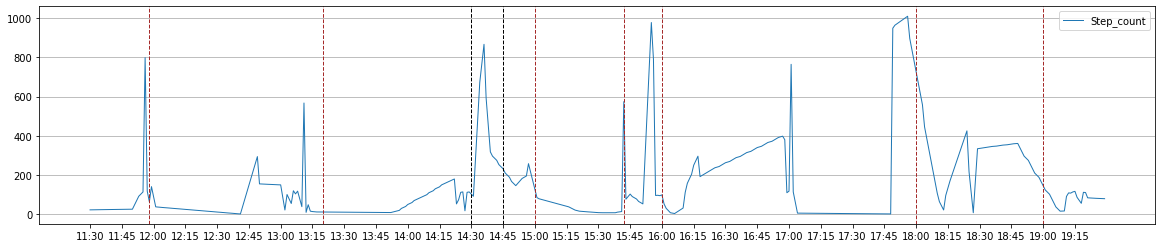

In [8]:
plt.plot(steps_x, steps_y, label = "Step_count")
plt.rcParams['figure.figsize'] = (20, 4)
plt.rcParams['font.size'] = 10
plt.rcParams["lines.linewidth"] = 1
plt.xticks(np.arange(0, 480, 15))
plt.grid(True, axis='y')

plt.axvline(28, color = 'brown', linestyle = '--', linewidth = 1) # 11:58 pm
plt.axvline(110, color = 'brown', linestyle = '--', linewidth = 1) # 13:20 pm
plt.axvline(180, color = 'black', linestyle = '--', linewidth = 1) # 14:30 pm
plt.axvline(195, color = 'black', linestyle = '--', linewidth = 1) # 14:30 pm
plt.axvline(210, color = 'brown', linestyle = '--', linewidth = 1) # 15:00 pm
plt.axvline(252, color = 'brown', linestyle = '--', linewidth = 1) # 15:42 pm
plt.axvline(270, color = 'brown', linestyle = '--', linewidth = 1) # 16:00 pm
plt.axvline(390, color = 'brown', linestyle = '--', linewidth = 1) # 18:00 pm
plt.axvline(450, color = 'brown', linestyle = '--', linewidth = 1) # 19:00 pm

plt.legend()

## 고려 사항
- 이동 상태에서의 평균 심박수
    - 느리게 걷기 (실내에서 이동) -> move
    - 평범하게 걷기 (평범한 이동) -> walk
    - 빠르게 걷기 (지하철 타러 갈 때) -> run
- 일반 상태에서의 평균 심박수 
    - 정지 상태 -> stay
    - 집중 상태 -> flow
- 휴식 상태에서의 평균 심박수 
    - 일반 휴식 -> rest
    - 수면 상태 (사용 X) -> sleep
- 긴장 상태(면접)에서의 평균 심박수 -> nervous

--------------

## 데이터에 알맞게 상태 분류 재정의
- 실내 이동 -> move
- 걷기 -> walk
- 빠른 걷기 -> run
- 지하철 탑승 중 -> subway
- 긴장 -> nervous
- 카페(휴식) -> stay

In [9]:
my_state = [
    ["move", "11:30", "11:45"],
    ["run", "11:46", "11:58"],
    ["subway", "11:59", "12:34"],
    ["walk", "12:35", "12:37"],
    ["subway", "12:38", "12:44"],
    ["walk", "12:45", "12:50"],
    ["subway", "12:51", "13:01"],
    ["walk", "13:02", "13:10"],
    ["stay", "13:11", "14:30"],
    ["walk", "14:31", "14:45"],
    ["stay", "14:46", "14:52"],
    ["move", "14:53", "14:59"],
    ["nervous", "15:00", "15:40"],
    ["move", "15:41", "15:48"],
    ["walk", "15:49", "16:10"],
    ["stay", "16:11", "16:50"],
    ["walk", "16:51", "17:05"],
    ["stay", "17:06", "17:45"],
    ["walk", "17:46", "17:55"],
    ["subway", "17:56", "18:07"],
    ["walk", "18:08", "18:11"],
    ["subway", "18:12", "18:18"],
    ["walk", "18:19", "18:30"],
    ["subway", "18:31", "19:07"],
    ["walk", "19:08", "19:30"]
]

In [10]:
point = 690
for my in my_state:
    start = my[1].split(":")
    end = my[2].split(":")
    
    start = (int(start[0]) * 60) + int(start[1])
    end = (int(end[0]) * 60) + int(end[1])
    
    my += [(start - point), (end - point)]

In [11]:
import numpy as np

In [12]:
def calAvg(info):
    afterAvg = []
    for i, v in enumerate(my_state):
        if i != len(my_state) - 1:
            label, start_idx, end_idx = v[0], v[3], v[4]
        else:
            label, start_idx, end_idx = v[0], v[3], v[4] - 1
            
        _avg = np.array(info[start_idx:end_idx + 1])
        _avg = np.average(_avg)
        _avg = [label, start_idx, end_idx, _avg]
        afterAvg.append(_avg)
        
    return afterAvg        

In [13]:
hearts_avg = calAvg(hearts_y)
steps_avg = calAvg(steps_y)

In [17]:
hearts_avg = pd.DataFrame(hearts_avg, columns = ["label", "start", "end", "avg"])
steps_avg = pd.DataFrame(steps_avg, columns = ["label", "start", "end", "avg"])

In [20]:
hearts_avg_y = list(hearts_avg["avg"])
steps_avg_y = list(steps_avg["avg"])

In [25]:
steps_avg.apply(lambda x: print(x))

0        move
1         run
2      subway
3        walk
4      subway
5        walk
6      subway
7        walk
8        stay
9        walk
10       stay
11       move
12    nervous
13       move
14       walk
15       stay
16       walk
17       stay
18       walk
19     subway
20       walk
21     subway
22       walk
23     subway
24       walk
Name: label, dtype: object
0       0
1      16
2      29
3      65
4      68
5      75
6      81
7      92
8     101
9     181
10    196
11    203
12    210
13    251
14    259
15    281
16    321
17    336
18    376
19    386
20    398
21    402
22    409
23    421
24    458
Name: start, dtype: int64
0      15
1      28
2      64
3      67
4      74
5      80
6      91
7     100
8     180
9     195
10    202
11    209
12    250
13    258
14    280
15    320
16    335
17    375
18    385
19    397
20    401
21    408
22    420
23    457
24    479
Name: end, dtype: int64
0      23.975098
1     118.129207
2      27.947917
3       6.312500
4    

label    None
start    None
end      None
avg      None
dtype: object

일상상태 정보가 더필요?
- 면접 상태를 학습된 모델에 넣어 어디와 유사한지 봐야함